# Objectives

- A quick review of machine learning.
- Introducing scikit learn package.
- Representing and visualizing data in scikit learn.
- Working with different datasets such as Iris, Digits, Faces datasets.
- A Preview on machine learning using scikit learn.

## Supervised Learning: 

##### Classification and Regression  

- **In classification, the label is discrete**, such as "spam" or "no spam". 
- **In regression, the label is continuous**, that is a float output. 

## Unsupervised Learning: 

##### Clustering, Dimensionality Reduction and Density Estimation

# Data in scikit-learn

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
 whatever you can describe with a fixed set of quantitative traits.
 
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.

### A Simple Example: the Iris Dataset

#### Loading the Iris Data with Scikit-learn

- **Features** in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm


- **Target classes** to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [8]:
n_samples, n_features = iris.data.shape
print('samles= %d' %n_samples)
print('features= %d' %n_features)

samles= 150
features= 4


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

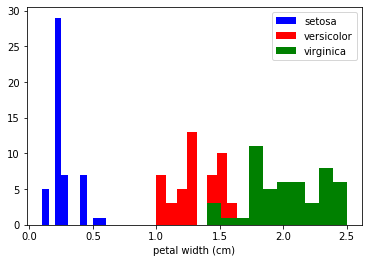

In [10]:
x_index = 3
color = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), color):
        plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right');

## Other Available Data

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [13]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [14]:
n_samples, n_features = digits.data.shape
print('n_samples= %d' %n_samples)
print('n_features= %d' %n_features)

n_samples= 1797
n_features= 64


In [15]:
print('image(shape)= ',digits.images.shape)
print('data(shape)= ',digits.data.shape)

image(shape)=  (1797, 8, 8)
data(shape)=  (1797, 64)


In [16]:
x = digits.images.reshape((1797, 64))
print(x.shape)

(1797, 64)


## Olivetti faces dataset

In [17]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [18]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [19]:
print(faces.data.shape)

(400, 4096)


In [20]:
print(faces.target.shape)

(400,)


In [21]:
n_samples, n_features = faces.data.shape
print('n_samples= %d' %n_samples)
print('n_features= %d' %n_features)

n_samples= 400
n_features= 4096


## Classifying faces

In [22]:
x, y = faces.data, faces.target

### STEP 1: Import and create the estimator


In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

### STEP 2: Train on the dataset (`fit`)

In [24]:
clf.fit(x, y)

/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### STEP 3: Predict for new data

In [25]:
y_pred = clf.predict(x)

### STEP 4: Evaluate (here, the accuracy)

In [26]:
accuracy = np.mean(y_pred==y)
print('accuracy= ', accuracy)

accuracy=  0.895


### Split to Train and Test Data
j4-start (razavi)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= .5, random_state= 123)

In [29]:
print(X_train.shape[0])
print(X_test.shape[0])

print(X_train.shape) #200 radif dade dare ke har dade, 4096 ta features (Column) dare.
print(X_test.shape)


200
200
(200, 4096)
(200, 4096)


In [30]:
print(' X_train=',X_train.shape,'\n','X_test=',X_test.shape,'\n','y_train=',y_train.shape,'\n','y_test=',y_test.shape)

 X_train= (200, 4096) 
 X_test= (200, 4096) 
 y_train= (200,) 
 y_test= (200,)


In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,100), verbose= True, max_iter= 300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 3.79335948
Iteration 2, loss = 3.83995036
Iteration 3, loss = 3.80019492
Iteration 4, loss = 3.70007298
Iteration 5, loss = 3.64134861
Iteration 6, loss = 3.56055521
Iteration 7, loss = 3.53780469
Iteration 8, loss = 3.50329632
Iteration 9, loss = 3.47000065
Iteration 10, loss = 3.43087122
Iteration 11, loss = 3.39989477
Iteration 12, loss = 3.35534241
Iteration 13, loss = 3.31398652
Iteration 14, loss = 3.26954923
Iteration 15, loss = 3.23010196
Iteration 16, loss = 3.18200120
Iteration 17, loss = 3.13931728
Iteration 18, loss = 3.09092894
Iteration 19, loss = 3.04145962
Iteration 20, loss = 2.99437226
Iteration 21, loss = 2.93992162
Iteration 22, loss = 2.88705059
Iteration 23, loss = 2.83541161
Iteration 24, loss = 2.77869875
Iteration 25, loss = 2.72039099
Iteration 26, loss = 2.66108825
Iteration 27, loss = 2.60055212
Iteration 28, loss = 2.54087766
Iteration 29, loss = 2.47719634
Iteration 30, loss = 2.41576782
Iteration 31, loss = 2.35336687
Iteration 32, los

In [32]:
accuracy = np.mean(y_pred==y_test)
print('accuracy= %.2f'%accuracy)

accuracy= 0.87


### Using `metrics` module in `sklearn`

In [33]:
# another way for checking the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print('accuracy = %.2f' %acc)

accuracy = 0.87


## Classifying Digits

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
print(digits.data.shape)
print(digits.target.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)


In [35]:
x, y = digits.data, digits.target

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=123)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100),max_iter= 10, verbose= True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('accuracy= %.2f'%accuracy_score(y_pred, y_test))

Iteration 1, loss = 5.74310252
Iteration 2, loss = 3.12017421
Iteration 3, loss = 2.11710226
Iteration 4, loss = 1.26033582
Iteration 5, loss = 0.73459661
Iteration 6, loss = 0.54665772
Iteration 7, loss = 0.41889898
Iteration 8, loss = 0.32200707
Iteration 9, loss = 0.27404205
Iteration 10, loss = 0.22951112
accuracy= 0.90


/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[93  0  0  1  0  2  1  0  0  0]
 [ 0 80  0  2  0  1  2  1 10  0]
 [ 0  2 84  0  0  1  0  0  5  0]
 [ 0  1  5 74  0  0  0  1  5  3]
 [ 1  0  0  0 95  1  0  1  0  0]
 [ 0  0  0  1  0 84  1  0  1  2]
 [ 0  1  0  0  0  0 89  0  1  0]
 [ 0  0  2  0  5  0  0 85  4  0]
 [ 0  0  2  1  1  0  0  1 48  1]
 [ 0  4  0  1  0  8  0  1  4 79]]


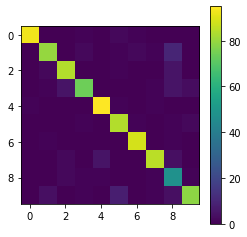

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation= 'nearest')
plt.colorbar()
plt.show()

## Training and Testing Data in `sklearn`

In [39]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
x, y = iris.data, iris.target

clf = KNeighborsClassifier()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .3,
                                                   random_state=42, stratify=y)


In [41]:
clf.fit(x_test, y_test)
y_pred = clf.predict(x_test)
acc= accuracy_score(y_pred, y_test)
print('accuracy= %.2f'%acc)


accuracy= 0.93


In [42]:
labeles, counts = np.unique(y, return_counts=True)
print(labeles)
print(counts)
print(counts/len(y))

[0 1 2]
[50 50 50]
[0.33333333 0.33333333 0.33333333]


In [43]:
labeles, counts = np.unique(y_train, return_counts=True)
print(labeles)
print(counts)
print(counts/len(y))

[0 1 2]
[35 35 35]
[0.23333333 0.23333333 0.23333333]


### Train and Test

In [44]:
clf.fit(x_train, y_train)      # train
y_pred = clf.predict(x_test)   # test
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data = %.2f" % (test_accuracy * 100) + " %")

Accuracy on test data = 97.78 %


### Visualize results
We can also visualize the correct and failed predictions

In [45]:
correct_classifed_samples = np.where(y_pred == y_test)
incorrect_classifed_samples = np.where(y_pred != y_test)[0]
print('incorrect_classifed_samples= ','\n',incorrect_classifed_samples)

incorrect_classifed_samples=  
 [42]


# Supervised Learning -- Classification

In [46]:
from sklearn.datasets import make_blobs
x, y = make_blobs(centers=2, random_state=34, cluster_std= 1.0)
print(x.shape)
print(y.shape)

(100, 2)
(100,)


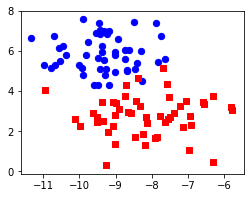

In [47]:
plt.figure(figsize=(4,3)) #??????????????????
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c='red', s=40, label='1', marker='s');

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=43,
                                                   stratify= y)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(verbose= True, max_iter= 300)

In [50]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(y_pred)  # predicted labels
print(y_test) 
print()
print('accuracy= ',accuracy)

[LibLinear][0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 0]
[0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 0]

accuracy=  0.9


/Users/mahrokh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### to compute predition and accuracy together:

In [51]:
prediction_accuracy = clf.score(x_test, y_test)
print(prediction_accuracy)

0.9


In [52]:
print(clf.score(x_train, y_train))

0.86


In [53]:
print(clf.coef_)
print(clf.intercept_)

[[-0.68295435 -1.665891  ]]
[1.08049024]


Another classifier: K Nearest Neighbors
------------------------------------------------

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [55]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [56]:
print(knn.score(x_test, y_test))

0.96


In [57]:
print(knn.score(x_train, y_train))

0.94


## Tunning Hyper-parameters

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.
      </li>
    </ul>
</div>

In [58]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=43,
                                                    stratify=y)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [59]:
print(x_test.shape)
print(y_test.shape)

(75, 4)
(75,)


In [60]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [61]:
print(knn.score(x_test, y_test))

0.9866666666666667


# Supervised Learning -- Regression

In [62]:
xb= np.linspace(-3, 3, 100)
print(xb[:10])
print(xb.shape)
x= xb[:, np.newaxis]
print(x.shape)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]
(100,)
(100, 1)


In [63]:
rng = np.random.RandomState(42)
y = np.sin(xb) + rng.uniform(size=len(xb))
print(y[:10])

[ 0.23342011  0.74989057  0.4722039   0.28085607 -0.21862918 -0.27412301
 -0.42592425  0.33005522  0.01484964  0.0738155 ]


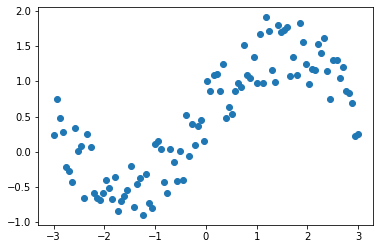

In [64]:
plt.plot(xb,y, 'o');

Linear Regression:
================

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state= 43)

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
s = regressor.score(x_test, y_test)
print('score = %.2f'%s)

score = 0.58


In [67]:
print('coeficient= ', regressor.coef_) #w
print('intercept ', regressor.intercept_) #b

coeficient=  [0.35592588]
intercept  0.462816341351432


#### plot for function includig 'w' and 'b'
 y = wx + b

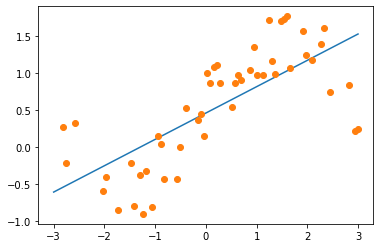

In [68]:
y1 =  x.min()*regressor.coef_ + regressor.intercept_
y2 =  x.max()*regressor.coef_ + regressor.intercept_
plt.plot([x.min(), x.max()], [y1, y2])
plt.plot(x_train, y_train, 'o');

In [69]:
y_pred_train = regressor.predict(x_train)

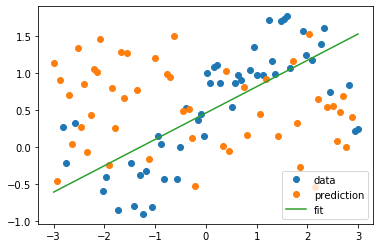

In [70]:
plt.plot(x_train, y_train, 'o', label= "data")
plt.plot(x_test, y_pred_train, 'o', label= "prediction")
plt.plot([x.min(), x.max()], [y1, y2], label = 'fit')
plt.legend(loc = 'best');

In [71]:
y_pred_train = regressor.predict(x_test)

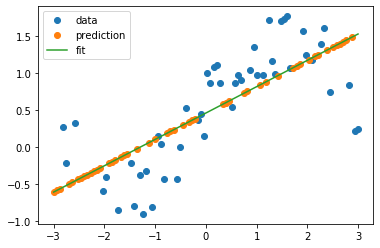

In [72]:
plt.plot(x_train, y_train, 'o', label= "data")
plt.plot(x_test, y_pred_train, 'o', label= "prediction")
plt.plot([x.min(), x.max()], [y1, y2], label = 'fit')
plt.legend(loc = 'best');

In [73]:
regressor.score(x_test, y_test)

0.5832804646060259

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a feature containing  `sin(4x)` to `X` and redo the fit. Visualize the predictions with this new richer, yet linear, model.
      </li>
    </ul>
</div>

In [74]:
xx_train = np.concatenate((x_train, np.sin(x_train)), axis=1)
xx_test = np.concatenate((x_test, np.sin(x_test)), axis=1)

In [75]:
regressor.fit(x_train, y_train)
#score = regressor.score(xx_test, y_test)
#print('score= %.2f'%score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

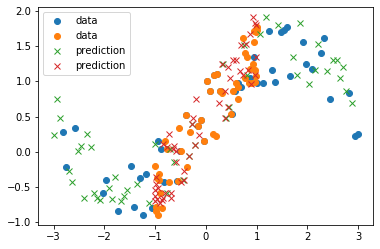

In [76]:
plt.plot(xx_train, y_train, 'o', label='data')
plt.plot(xx_test, y_test, 'x', label='prediction')
plt.legend(loc='best')
plt.show()

KNeighborsRegression
=======================

In [77]:
from sklearn.neighbors import KNeighborsRegressor
kneighbour = KNeighborsRegressor(n_neighbors=1)

In [78]:
kneighbour.fit(x_train, y_train)
y_pred_train = kneighbour.predict(x_train)

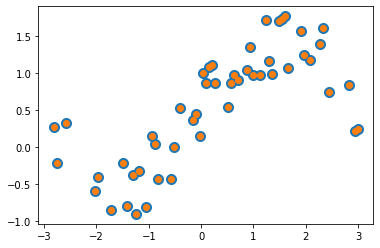

In [79]:
plt.plot(x_train, y_train, 'o', markersize= '10')
plt.plot(x_train, y_pred_train, 'o');

In [80]:
y_pred_test = kneighbour.predict(x_test)

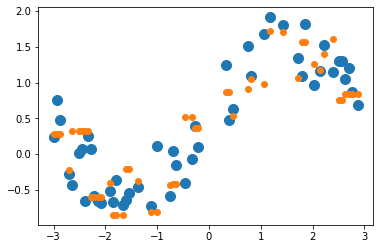

In [81]:
plt.plot(x_test, y_test, 'o', markersize= '10')
plt.plot(x_test, y_pred_test, 'o');

In [82]:

kneighbour.score(x_test, y_test)

0.7586268230648983

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``. You can learn about the dataset by reading the ``DESCR`` attribute.
      </li>
    </ul>
</div>

In [118]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier


boston = load_boston()
x, y  = boston.data, boston.target


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=.5)

In [119]:
linearRegression = LinearRegression()
#kneighbours = KNeighborsClassifier(n_neighbors=1)

In [121]:
linearRegression_fit = linearRegression.fit(x_train, y_train)
linearRegression_score = linearRegression.score(x_test, y_test)
print('linearRegression_score=%.2f ' %linearRegression_score)


linearRegression_score=0.70 


In [128]:
kneigbours_fit = kneighbour.fit(x_train, y_train)
score = kneighbour.score(x_test, y_test)
print('kneigbours_score= %.2f'%score)

kneigbours_score= 0.34
